## Химическое равновесие и свободная энергия

Химическое равновесие — это состояние, возникающее при выполнении химической реакции, в котором свободная энергия Гиббса минимальна. Энергия Гиббса показывает, какая часть от полной внутренней энергии системы может быть использована для химических превращений, она позволяет установить возможность протекания химической реакции в заданных условиях.


Энергия Гиббса является термодинамическим потенцилом, поэтому нас иннтересуют только отрицательные значения. Чем дальше значение от нуля тем лучше, тем оптимальнее будет расход веществ для успешного выполнения реакции.

От того, какое количество вещества мы возьмем для каждого элемента, зависит момент когда в системе наступит химическое равновесие. Для каждого момента свободная энергия разная, нужно подобрать количество вещества так, чтобы момент, в который наступит химическое равновесие минимизировал свободную энергию.

## Постановка задачи
Таким образом, можно рассмотреть задачу минимизации, то есть для конкретной химической реакции необходимо определить соотноошения количества веществ так, чтобы в ходе выполнения реакции свободная энергия была минимальна.

Будем оптимизировать состав газов, образующихся при горении смеси гидразина и кислорода при температуре $T = 3500°К$ и давлении $P = 750$ фунтов на квадратный дюйм ```[1]```



[1] ```Chemical Equilibrium in Complex Mixtures W. B. White, S. M. Johnson, AND G. B. Dantzig, 1957```



$$\frac{1}{2} N_2H_4 + \frac{1}{2} O_2$$

Свободная энергия системы из $N$ химических элементов может быть представлена как

$$G(x_1, x_2, \ldots, x_N) = \sum_{i=1}^N x_i (c_i + \ln P + \ln(\frac{x_i}{x_T})) \rightarrow \min$$

где $x_i$ задает количество вещества $i$-ого химического элемента, $x_T = \sum_{i=1}^N x_i$ общее количество вещества, а вободная энергия каждого элемента в отдельности вычисляется через $c_i = \frac{F}{RT}$ и определяется значениями из таблицы ```[1]```


| $j$    | Элемент | $c_j$
| -------- | ------- | ------- |
| 1  | $H$    |    $-10.021$   |
| 2 | $H_2$     |   $-21.096$    |
| 3    | $H_2O$    |    $-37.986$   |
| 4    | $N$    |    $-9.846$   |
| 5    | $N_2$   |   $-28.653$    |
| 6    | $NH$    |    $-18.918$   |
| 7    | $NO$   |   $-28.032$    |
| 8    | $O$    |    $-14.640$   |
| 9    | $O_2$    |   $-30.594$    |
| 10    | $OH$    |   $-26.111$    |


При следующих ограничениях (сохранение массы)

$x_1 + 2x_2 + 2x_3 + x_6 + x_{10} = 2$

$x_4 + 2x_5 + x_6 + x_7 = 1$

$x_3 + x_7 + x_8 + 2x_9 + x_{10} = 1$



И, кроме того, количество вещества не может быть отрицателным
$x_j \geq 0, j = 1 \ldots 10$

$f(x_i) = x_i(c_i + \ln(x_i))$



$$G(x_1, x_2, \ldots, x_N) + \sum_{i=1}^N \sin \gamma x_i + \gamma x_i \rightarrow \min$$

## Методы оптимизации

В оригинальной статье авторы апроксимируют исходную функцию с помощью кусочно-линейной и решают задачу методами линейного программирования.

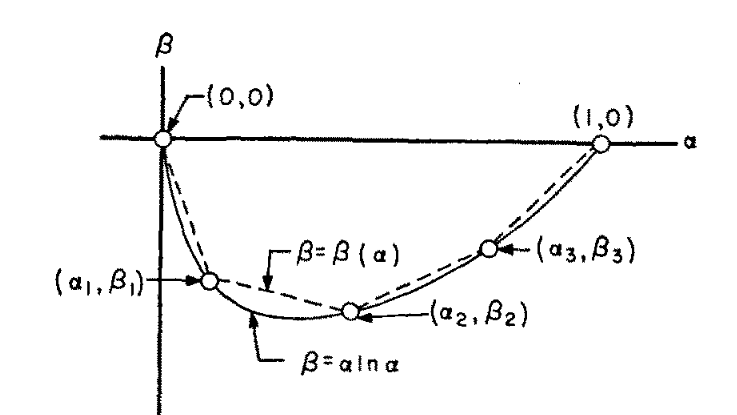


Еще существуют константы равновесия, которые используются в более ранних исследованиях и дают неоптимальные решения.

Мы пойдем другим путем и будем оптимизировать нелинейную функцию $G(x_1, x_2, \ldots x_N)$.

Поскольку функция дифференцируема на области определения, то логично применить здесь градиентные методы. Кроме того, необходимо дополнительно учитывать ограничения, связанные с количеством вещества, которое не может быть отрицательным. Это учитывается в целевой функции как штрафное слагаемое, поэтому измененная целевая функция может иметь сложный ландшафт. И градиентные методы здесь будут находить лишь локальное решение. Отсюда возникает необходимость использовать глобальные методы оптимизации, например, метод роя частиц и генетические алгоритмы. Подобные методы занимаются исследованием пространства, в результате чего вероятность найти глобальный минимум будет выше.

### PSO

Так как в задаче присутствуют линейные ограниченичея в виде равенств, было решено использовать модифицированную версию метода роя частиц, которая была предложена в следующей работе:

```U. Paquet and A. P. Engelbrecht, "A new particle swarm optimiser for linearly constrained optimisation," The 2003 Congress on Evolutionary Computation, 2003. CEC '03., Canberra, ACT, Australia, 2003, pp. 227-233 Vol.1, doi: 10.1109/CEC.2003.1299579```

Отличия заключаются в методе инициализации роя и том, как происходит изменение положения частицы с глобальным оптимумом.

In [ ]:
"""
Created on Mon Mar  4 13:06:05 2024

@author: kamilfatkhiev
"""
import numpy as np
from typing import Callable, Tuple, List


def free_energy(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10) -> float:

    am_of_sub = sum([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])
    c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = [-10.021, -21.096, -37.986, -9.846, -28.653, -18.918, -28.032, -14.640, -30.594, -26.111]
    g = x1 * (c1 + np.log(750) + np.log(x1 / am_of_sub)) \
        + x2 * (c2 + np.log(750) + np.log(x2 / am_of_sub)) \
        + x3 * (c3 + np.log(750) + np.log(x3 / am_of_sub)) \
        + x4 * (c4 + np.log(750) + np.log(x4 / am_of_sub)) \
        + x5 * (c5 + np.log(750) + np.log(x5 / am_of_sub)) \
        + x6 * (c6 + np.log(750) + np.log(x6 / am_of_sub)) \
        + x7 * (c7 + np.log(750) + np.log(x7 / am_of_sub)) \
        + x8 * (c8 + np.log(750) + np.log(x8 / am_of_sub)) \
        + x9 * (c9 + np.log(750) + np.log(x9 / am_of_sub)) \
        + x10 * (c10 + np.log(750) + np.log(x10 / am_of_sub)) \
        + np.sum(np.sin(0.1 * np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]))) \
        + np.sum(0.1 * np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]))
    return g


class PSO():

    def __init__(self,
                 func: Callable,
                 n_variables: int,
                 max_iterations: int = 1000,
                 n_particles: int = 10,
                 w: float = 0.7928,
                 c_1: float = 1.49618,
                 c_2: float = 1.49618,
                 eps: float = 1e-9,
                 boundries: List[Tuple[float, float]] = None):
        self.func = func
        self.max_iterations = max_iterations
        self.n_variables = n_variables
        self.n_particles = n_particles
        self.w = w
        self.c_1 = c_1
        self.c_2 = c_2
        self.eps = eps
        self.boundries = boundries

    # Частицы инициализируются как решение СЛАУ, состоящей из ограничений
    def create_particle(self):

        particle = np.zeros(10)

        while not np.all(particle > 0):

            x2, x5, x6, x7, x8, x9, x10 = np.random.uniform(size=(7,))
            x1 = -2 * x2  - x6 + 2 * x7 + 2 * x8 + 4 * x9 + x10
            x3 = 1 - x7 - x8 - 2 * x9 - x10
            x4 = 1 - 2 * x5 - x6 - x7
            particle = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])

        return particle

    # Переменная v, необходимая для обновления позиции частицы с глобальным оптимумом,
    # вычисляется как решение однородной СЛАУ, состоящей из ограничений
    def create_v(self):

        v = np.zeros(10)
        x2, x5, x6, x7, x8, x9, x10 = np.random.uniform(size=(7,))
        x1 = -2 * x2  - x6 + 2 * x7 + 2 * x8 + 4 * x9 + x10
        x3 = -x7 - x8 - 2 * x9 - x10
        x4 = -2 * x5 - x6 - x7
        v = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])

        return v


    def update_position_and_velocity(self,
                                     particles: np.ndarray,
                                     velocities: np.ndarray,
                                     pbest: np.ndarray,
                                     gbest: np.ndarray,
                                     gbest_id: float) -> Tuple[np.ndarray, np.ndarray]:

        r_1 = np.random.rand()
        r_2 = np.random.rand()
        social_component = self.c_1 * r_1 * (pbest - particles)
        cognitive_component = self.c_2 * r_2 * (gbest[:, None] - particles)
        velocities = self.w * velocities + social_component + cognitive_component
        particles = particles + velocities

        v = self.create_v()
        particles[:, gbest_id] = pbest[:, gbest_id] + v

        for i in range(self.n_particles):
            if np.all(particles[:, i] > 0):
                continue
            else:
                particles[:, i] = self.create_particle()

        return particles, velocities


    def create_population_and_velocity(self) -> Tuple[np.ndarray, np.ndarray]:

        particles = np.empty((self.n_variables, self.n_particles))
        velocities = np.zeros((self.n_variables, self.n_particles))

        for i in range(self.n_particles):
            particles[:, i] = self.create_particle()

        return particles, velocities


    def optimize(self) -> dict:

        i = 0
        no_diff_count = 0
        gbest_obj = np.inf
        gbest = []
        particles, velocities = self.create_population_and_velocity()

        while (i < self.max_iterations) and (no_diff_count < 300):
            if i == 0:
                pbest = particles
                pbest_obj = self.func(*particles)
                gbest_id = pbest_obj.argmin()
                gbest = pbest[:, gbest_id]
                gbest_obj = pbest_obj.min()
            else:
                particles, velocities = self.update_position_and_velocity(particles,
                                                                          velocities,
                                                                          pbest,
                                                                          gbest,
                                                                          gbest_id)
                obj = self.func(*particles)

                pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
                pbest[:, (pbest_obj >= obj)] = particles[:, (pbest_obj >= obj)]

                gbest_id = pbest_obj.argmin()
                gbest = pbest[:, gbest_id]
                gbest_obj_prev = gbest_obj
                gbest_obj = pbest_obj.min()
                if np.abs(gbest_obj_prev - gbest_obj) < self.eps:
                    no_diff_count += 1
            i += 1

        return {'Function opt.': gbest_obj, 'Opt. position': gbest, 'Number of iterations': i}


Создаем экзепляр класса и запускаем 100 прогонов алгоритма.

In [ ]:
optimizer = PSO(func=free_energy,
                n_variables=10,
                n_particles=10)

g_best_pso = []
iterations_pso = []



for _ in range(100):
    result = optimizer.optimize()
    g_best_pso.append(result['Function opt.'])
    iterations_pso.append(result['Number of iterations'])


Ячейка ниже здесь для демонстрации того, что алгоритм действительно работает. До оптимизации при случайной инициализации 10 частиц значения целевой функции больше, чем после оптимиизации параметров.

In [ ]:
def create_particle():

        particle = np.zeros(10)

        while not np.all(particle > 0):

            x2, x5, x6, x7, x8, x9, x10 = np.random.uniform(size=(7,))
            x1 = -2 * x2  - x6 + 2 * x7 + 2 * x8 + 4 * x9 + x10
            x3 = 1 - x7 - x8 - 2 * x9 - x10
            x4 = 1 - 2 * x5 - x6 - x7
            particle = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])

        return particle


def create_population(n_particles: int) -> np.ndarray:

        particles = np.empty((10, n_particles))
        # velocities = np.zeros((10, n_particles))

        for i in range(n_particles):
            particles[:, i] = create_particle()

        return particles


particles = create_population(10)

print(free_energy(*particles))

[-30.99649213 -33.64867497 -33.11677821 -27.84153689 -32.19773671
 -31.1029301  -27.49251361 -35.37767642 -27.14291206 -32.9428916 ]


In [ ]:
print(np.mean(np.array(g_best_pso), axis=0))
g_best_pso

-37.46289978150755


[-38.056056922175415,
 -38.491240914221585,
 -37.24389353529713,
 -37.315001459032324,
 -37.15502283677975,
 -37.48459851561368,
 -37.41824873192422,
 -37.7616565425026,
 -38.07735322731116,
 -36.93643903293586,
 -36.940687122622506,
 -37.08656029044564,
 -37.48781615632284,
 -38.137692389850976,
 -37.10351914128239,
 -37.635157288758485,
 -37.33238592921177,
 -37.39322085470498,
 -37.52692100985318,
 -37.48504918083161,
 -37.575602177591854,
 -36.952640083271035,
 -37.43676035468281,
 -37.49507656914526,
 -37.57489998856237,
 -37.206611772670996,
 -38.026192018848796,
 -37.864124316625585,
 -37.58160928406363,
 -37.6255631536011,
 -37.16658065077798,
 -37.56216857166347,
 -37.37535846779131,
 -37.37138465387737,
 -37.421477271757404,
 -37.82046110522833,
 -37.375851721916774,
 -37.738189069891874,
 -37.327421503500304,
 -37.41956412736937,
 -37.93712550363525,
 -37.632300136176,
 -38.47835872678688,
 -37.23399030209678,
 -37.57013016605685,
 -37.847443177312016,
 -37.06251935799508,
 

In [ ]:
g_best_pso = [-38.056056922175415,
 -38.491240914221585,
 -37.24389353529713,
 -37.315001459032324,
 -37.15502283677975,
 -37.48459851561368,
 -37.41824873192422,
 -37.7616565425026,
 -38.07735322731116,
 -36.93643903293586,
 -36.940687122622506,
 -37.08656029044564,
 -37.48781615632284,
 -38.137692389850976,
 -37.10351914128239,
 -37.635157288758485,
 -37.33238592921177,
 -37.39322085470498,
 -37.52692100985318,
 -37.48504918083161,
 -37.575602177591854,
 -36.952640083271035,
 -37.43676035468281,
 -37.49507656914526,
 -37.57489998856237,
 -37.206611772670996,
 -38.026192018848796,
 -37.864124316625585,
 -37.58160928406363,
 -37.6255631536011,
 -37.16658065077798,
 -37.56216857166347,
 -37.37535846779131,
 -37.37138465387737,
 -37.421477271757404,
 -37.82046110522833,
 -37.375851721916774,
 -37.738189069891874,
 -37.327421503500304,
 -37.41956412736937,
 -37.93712550363525,
 -37.632300136176,
 -38.47835872678688,
 -37.23399030209678,
 -37.57013016605685,
 -37.847443177312016,
 -37.06251935799508,
 -37.81203607766774,
 -37.33033529064156,
 -37.16038163789383,
 -37.535320303882,
 -37.56360661267008,
 -37.396449860634604,
 -37.86885420024471,
 -37.81484945944598,
 -37.18348694008989,
 -37.124203192229174,
 -37.45482913097942,
 -36.704073158324725,
 -37.3856335981375,
 -37.297032427393795,
 -36.90794816983089,
 -37.0343841575655,
 -37.3934387525175,
 -37.49266063022763,
 -38.140495291514505,
 -37.16538887225674,
 -37.454336744757974,
 -37.73822108499152,
 -37.86730990914404,
 -37.32938293142757,
 -37.58145028525995,
 -37.78588882168978,
 -37.23772127569075,
 -37.028411214584686,
 -37.5364799160263,
 -37.069328984748836,
 -37.40616903717888,
 -37.51790434800535,
 -37.627215156338025,
 -37.372150992083775,
 -37.719279388961496,
 -37.84928182203833,
 -37.40466987475928,
 -37.33393291313805,
 -36.78819459924471,
 -37.243766529820945,
 -37.61834962491328,
 -37.179696299036664,
 -37.40302134622051,
 -37.227588912941364,
 -37.425708579545535,
 -37.83838097524003,
 -37.407788289606614,
 -37.5946205544965,
 -37.363022472806676,
 -37.25681544954402,
 -36.98478706720416,
 -37.92048712347142,
 -36.66528254711492]

In [ ]:
len(g_best_pso)

100

###Генетический алгоритм
В нашей работе реализован классический вариант генетического алгоритма.

In [ ]:
import numpy as np

# Генерация первоначальной популяции
def create_first_population(count_individual):
    population = []
    population_count = []
    while len(population) < count_individual:
        individual = np.zeros(7)
        individual_count = np.zeros(3)
        while not ((np.all(individual > 0)) & (np.all(individual_count > 0))):
            x2, x3, x5, x6, x7, x9, x10 = np.random.uniform(size=(7,))
            x1 = 2 - 2*x2 - 2*x3 - x6 - x10
            x4 = 1 - 2*x5 - x6 - x7
            x8 = 1 - x3 - x7 - 2*x9 - x10
            individual = np.array([x2, x3, x5, x6, x7, x9, x10])
            individual_count = np.array([x1, x4, x8])
        population.append(individual)
        population_count.append(individual_count)
    return np.array(population), np.array(population_count)

# Вычисление функции пригодности каждой особи в популяции
def cal_pop_fitness(population, population_count):
    fitness = []
    for individual, individual_count in zip(population, population_count):
      G(individual, individual_count)
      fitness.append(G(individual, individual_count))
    return fitness

# Функция G(x)
def G(individual, individual_count):
    x = np.concatenate((individual, individual_count))
    c = np.array([-21.096, -37.986, -28.653, -18.918, -28.032, -30.594, -26.111, -10.021, -9.846, -14.640])
    # с_count = [-10.021, -9.846, -14.640]
    # x2, x3, x5, x6, x7, x9, x10, x1, x4, x8
    gamma = 0.1
    N = len(x)
    x_T = np.sum(x)
    first_sum = np.sum(x * (c + np.log(750) + np.log(x / x_T)))
    second_sum = np.sum(np.sin(gamma * x))
    third_sum = np.sum(gamma * x)
    return first_sum + second_sum + third_sum

# Отбор родителей
def select_mating_pool(population, population_count, fitness, num_parents):
    parents = np.zeros((num_parents, population.shape[1]))
    parents_count = np.zeros((num_parents, population_count.shape[1]))
    for parent_num in range(num_parents):
        min_fitness_idx = np.where(fitness == np.min(fitness))
        min_fitness_idx = min_fitness_idx[0][0]
        parents[parent_num, :] = population[min_fitness_idx, :]
        parents_count[parent_num, :] = population_count[min_fitness_idx, :]
        fitness[min_fitness_idx] = 99999999999
    return parents, parents_count

# Скрещивание
def crossover(parents, offspring_size):
    offspring = np.zeros(offspring_size)
    crossover_point = np.uint8(offspring_size[1]//2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]

    return offspring

# Мутация генов
def mutation(offspring_crossover):
    offspring_crossover_original = np.copy(offspring_crossover)
    offspring_crossover_count = []
    for idx in range(offspring_crossover.shape[0]):
        individual_mutation_count = np.zeros(3)
        while not np.all(individual_mutation_count > 0):
            offspring_crossover[idx, :] = offspring_crossover_original[idx, :]
            random_value = np.random.uniform(0, 1, 1)
            random_gen = np.random.randint(0, 7)
            offspring_crossover[idx, random_gen] = random_value[0]
            x1 = 2 - 2*offspring_crossover[idx, 0] - 2*offspring_crossover[idx, 1] - offspring_crossover[idx, 3] - offspring_crossover[idx, 6]
            x4 = 1 - 2*offspring_crossover[idx, 2] - offspring_crossover[idx, 3] - offspring_crossover[idx, 4]
            x8 = 1 - offspring_crossover[idx, 1] - offspring_crossover[idx, 4] - 2*offspring_crossover[idx, 5] - offspring_crossover[idx, 6]
            individual_mutation_count = np.array([x1, x4, x8])
        offspring_crossover_count.append(individual_mutation_count)
    return offspring_crossover, offspring_crossover_count

In [ ]:
count_individual = 128 # количество особей в одной популяции
num_parents_mating = 8 # количество родителей
count_gen = 7 # количество переменных (генов)
num_generations = 1200 # количество поколений

new_population, new_population_count = create_first_population(count_individual)

# Генетический алгоритм
for generation in range(num_generations):
    fitness = cal_pop_fitness(new_population, new_population_count)
    parents, parents_count = select_mating_pool(new_population, new_population_count, fitness, num_parents_mating)
    offspring_crossover = crossover(parents, offspring_size=(count_individual - parents.shape[0], count_gen))
    offspring_mutation, offspring_mutation_count = mutation(offspring_crossover)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    new_population_count[0:parents.shape[0], :] = parents_count
    new_population_count[parents.shape[0]:, :] = offspring_mutation_count
    print(f"Лучшее решениие {generation + 1}-го поколения: ", np.min(cal_pop_fitness(new_population, new_population_count)))

# Получение наилучшего решения
fitness = cal_pop_fitness(new_population, new_population_count)
best_match_idx = np.where(fitness == np.min(fitness))[0][0]

print("Лучшее решение: ", new_population[best_match_idx, :], new_population_count[best_match_idx, :])
print("Функция для лучшего решения: ", fitness[best_match_idx])

Лучшее решениие 1-го поколения:  -40.60916230778793
Лучшее решениие 2-го поколения:  -41.19742944937521
Лучшее решениие 3-го поколения:  -41.273422691128445
Лучшее решениие 4-го поколения:  -41.643672258438166
Лучшее решениие 5-го поколения:  -41.653018998344805
Лучшее решениие 6-го поколения:  -41.67550515507641
Лучшее решениие 7-го поколения:  -41.709909982301355
Лучшее решениие 8-го поколения:  -41.709909982301355
Лучшее решениие 9-го поколения:  -41.72009224040865
Лучшее решениие 10-го поколения:  -41.72009224040865
Лучшее решениие 11-го поколения:  -41.76685865548174
Лучшее решениие 12-го поколения:  -41.78430250776909
Лучшее решениие 13-го поколения:  -41.78430250776909
Лучшее решениие 14-го поколения:  -41.78430250776909
Лучшее решениие 15-го поколения:  -41.79342109719572
Лучшее решениие 16-го поколения:  -41.79342109719572
Лучшее решениие 17-го поколения:  -41.798863977635705
Лучшее решениие 18-го поколения:  -41.80111557984825
Лучшее решениие 19-го поколения:  -41.80434556148

In [ ]:
g_best_ga = [-43.03769780292873,
 -43.11007763316478,
 -42.96063875742643,
 -42.881152970413424,
 -42.90534416271665,
 -43.04850090402843,
 -42.90702398693102,
 -43.06163505255435,
 -42.629274194473105,
 -43.05617786765327,
 -43.12989781765421,
 -43.10732766926434,
 -42.904518446518594,
 -42.87095078637947,
 -42.922247826265064,
 -42.95468063358267,
 -42.740366703740065,
 -42.99541225843782,
 -42.673762524598224,
 -42.99458722156972,
 -42.8603179047451,
 -42.9788545224824,
 -43.057970868340995,
 -43.03735793750801,
 -42.93494710115067,
 -43.07417041380357,
 -43.1003016986343,
 -42.823924328529394,
 -42.956544509001276,
 -42.94051107523073,
 -43.02516692326318,
 -43.0668534760603,
 -42.92782230721811,
 -43.004478553873014,
 -42.72817320790153,
 -42.775899426579294,
 -42.95054191478969,
 -43.00978862545587,
 -42.99048806044107,
 -42.80534843778776,
 -42.874364025373815,
 -42.81767299558954,
 -42.74978406560963,
 -43.03682574700842,
 -43.01085396513412,
 -43.03396638658845,
 -42.994986521565984,
 -42.88596333551806,
 -43.11036919530372,
 -42.820970834480484,
 -43.07175820520225,
 -42.84701214829165,
 -43.06124728835132,
 -42.92714005561619,
 -42.94653770037515,
 -43.06742322660268,
 -42.86484155529686,
 -43.00287060948746,
 -42.95765420236818,
 -42.92136497346927,
 -43.015867524796164,
 -42.91378900354407,
 -42.988728403237474,
 -42.8537061889762,
 -43.1210552323885,
 -42.95800158280952,
 -42.99519848713305,
 -42.90773417204392,
 -43.12187077823352,
 -43.016766235489214,
 -43.07446574786657,
 -42.909160731198575,
 -43.105933266184145,
 -42.952608237557,
 -42.729647129622435,
 -43.108673056220184,
 -42.87568317598235,
 -42.74100463351267,
 -43.05915391270341,
 -42.90816896635433,
 -42.87415302787606,
 -43.02363207307362,
 -43.07618584189088,
 -43.138116262325404,
 -42.777809443384776,
 -43.138568208256984,
 -43.03746792818057,
 -42.7632573556214,
 -43.10587667027882,
 -43.02365854470906,
 -42.96509216484035,
 -43.06623680364318,
 -42.83341703898142,
 -43.10862516565185,
 -42.89545055842449,
 -43.00661282115479,
 -42.906782576693196,
 -42.72092237271253,
 -42.722525894988955,
 -43.12191422115588]

### Дополнительный метод
Ввиду того, что статистические тесты Фридмана и Неменьи работают с более чем двумя выборками, нами было принято решения добавить еще один метод оптимизации, который будет являтся бейзлайном. В качестве такого методы был выбран SLSQP - метода общего незначения, который может работать как с задачами безусловной оптимизации, так и при наличии ограничений.

In [ ]:
from scipy.optimize import minimize
import numpy as np

# Функция, которую нужно минимизировать
def G(x):
    x2, x3, x5, x6, x7, x9, x10, x1, x4, x8 = x
    c = np.array([-21.096, -37.986, -28.653, -18.918, -28.032, -30.594, -26.111, -10.021, -9.846, -14.640])
    gamma = 0.1
    x_T = np.sum(x)
    first_sum = np.sum(x * (c + np.log(750) + np.log(x / x_T)))
    second_sum = np.sum(np.sin(gamma * x))
    third_sum = np.sum(gamma * x)
    return first_sum + second_sum + third_sum

# Ограничения на диапазон значений переменных x
def variable_bounds():
    return [(0, 1)] * 10  # Все переменные x больше 0

# Условия для переменных x1, x4, x8
def constraint_equations(x):
    x2, x3, x5, x6, x7, x9, x10, x1, x4, x8 = x
    return [
        2 - 2*x2 - 2*x3 - x6 - x10 - x1,
        1 - 2*x5 - x6 - x7 - x4,
        1 - x3 - x7 - 2*x9 - x10 - x8
    ]

# Генерация первоначальной популяции
def create_first_population():
    individual = np.zeros(7)
    individual_count = np.zeros(3)
    while not ((np.all(individual > 0)) & (np.all(individual_count > 0))):
        x2, x3, x5, x6, x7, x9, x10 = np.random.uniform(size=(7,))
        x1 = 2 - 2*x2 - 2*x3 - x6 - x10
        x4 = 1 - 2*x5 - x6 - x7
        x8 = 1 - x3 - x7 - 2*x9 - x10
        individual = np.array([x2, x3, x5, x6, x7, x9, x10])
        individual_count = np.array([x1, x4, x8])
    x = np.concatenate((individual, individual_count))
    return x

# Определение ограничений
constraints = {'type': 'eq', 'fun': constraint_equations}

# Минимизация функции с помощью метода SLSQP (Sequential Least Squares Programming)
result = minimize(G, create_first_population(), bounds=variable_bounds(), constraints=constraints, method='SLSQP', options={'ftol': 1e-2})

print("Минимум функции:", result.fun)
print("Оптимальные значения переменных x:", result.x)
print("Количество итераций:", result.nit)

In [ ]:
# x2, x3, x5, x6, x7, x9, x10, x1, x4, x8
#  2 - 2*x2 - 2*x3 - x6 - x10 - x1
2 - 2*result.x[0] - 2*result.x[1] - result.x[3] - result.x[6] - result.x[7]

In [ ]:
# x2, x3, x5, x6, x7, x9, x10, x1, x4, x8
#  1 - 2*x5 - x6 - x7 - x4
1 - 2*result.x[2] - result.x[3] - result.x[4] - result.x[8]

In [ ]:
# x2, x3, x5, x6, x7, x9, x10, x1, x4, x8
# 1 - x3 - x7 - 2*x9 - x10 - x8
1 - result.x[1] - result.x[4] - 2*result.x[5] - result.x[6] - result.x[9]

In [ ]:
g_best_sl = []

for _ in range(100):
  result = minimize(G, create_first_population(), bounds=variable_bounds(), constraints=constraints, method='SLSQP', options={'ftol': 1e-2})
  g_best_sl.append(result.fun)

len(g_best_sl)

In [ ]:
g_best_sl = [-43.01814861697633,
 -42.94192697650707,
 -42.94921096111761,
 -42.83050545699134,
 -43.004377637585584,
 -43.01760162841721,
 -42.996499000971546,
 -43.14766165379742,
 -42.87606854139776,
 -43.17156171760683,
 -43.14510812357442,
 -42.14252345093586,
 -42.95309694866124,
 -42.80009742473036,
 -41.70985848883437,
 -43.162503775864195,
 -42.95194459477442,
 -42.90470331339409,
 -42.92051921866594,
 -43.013422626972286,
 -43.00990110920727,
 -42.865359480906896,
 -42.98088631815992,
 -42.19252207623092,
 -42.86206097938016,
 -42.988577944063174,
 -43.11045843467219,
 -42.603689306569294,
 -43.158069825491616,
 -42.92191532262248,
 -43.04423428584872,
 -42.98507507161599,
 -41.80562348326183,
 -43.012501381740186,
 -43.02947905533492,
 -43.15435944128561,
 -43.07278938931405,
 -42.77225688565919,
 -43.17478270300156,
 -42.87914911797728,
 -43.175564483459986,
 -43.15510250307623,
 -41.50184978900933,
 -43.161611916286944,
 -42.96134574686924,
 -43.00743964370997,
 -42.926012239248934,
 -42.893522409805065,
 -43.05009939453003,
 -43.00640530184131,
 -41.35363934394788,
 -42.88865300261733,
 -42.94137961458019,
 -42.881470355309574,
 -43.12733896754087,
 -43.14781584198595,
 -43.17061012765856,
 -42.97703713202963,
 -43.06507272374687,
 -42.94219807803811,
 -43.15227808727323,
 -42.97575822398979,
 -42.93965128118359,
 -42.89450299995132,
 -43.12554401285614,
 -41.09369717844167,
 -43.11933515860232,
 -43.05616145683577,
 -42.91723805790569,
 -43.16097890893462,
 -43.1675162215638,
 -43.08774414370481,
 -43.18147634747936,
 -43.02781483031487,
 -42.99611169062078,
 -42.02494872055194,
 -43.00839227070062,
 -42.972620552857705,
 -43.063461987627875,
 -42.97896751416921,
 -43.0369666793221,
 -43.07982644577704,
 -42.96184472357961,
 -41.74704501609141,
 -42.95132929620816,
 -42.97469975990034,
 -43.02702281595186,
 -42.87935604995878,
 -43.00869313902243,
 -43.04369423965409,
 -43.09665689110666,
 -42.920310477375864,
 -43.07032146959298,
 -42.988826299266954,
 -40.81896333558549,
 -42.96019780809565,
 -43.16616257298104,
 -42.94087579850476,
 -43.16768953330497,
 -42.99085355861094]

### Построим распределение результатов работы наших алгоритмов


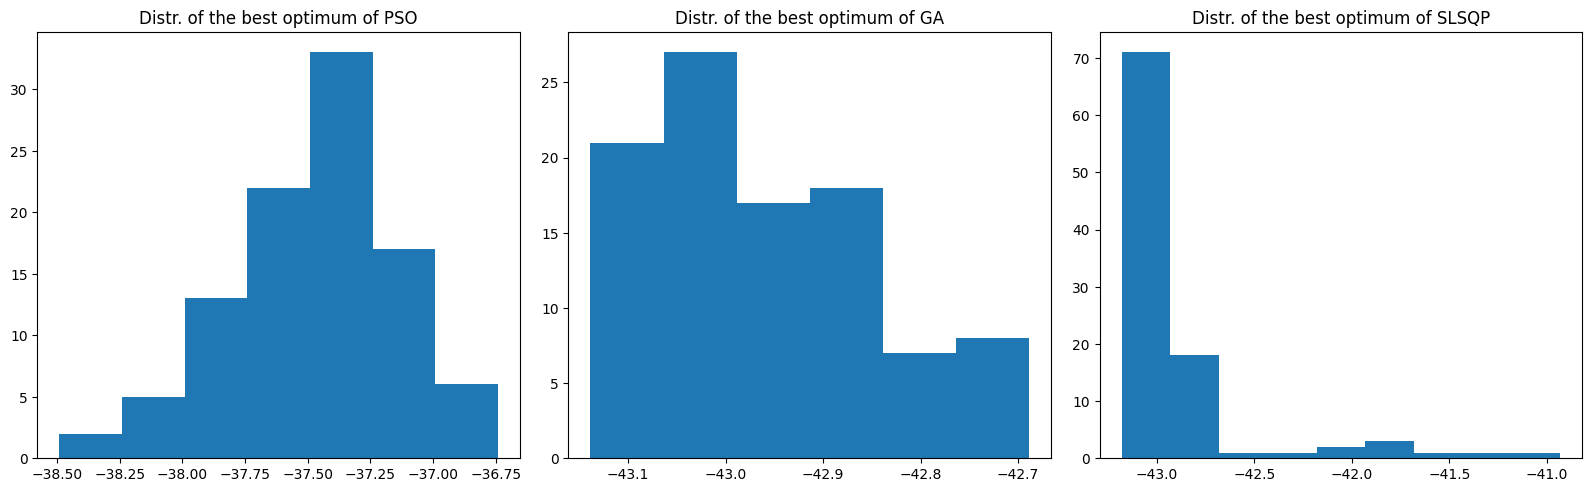

In [ ]:
# Распределение значений оптимума
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 3, figsize=(16, 5))

axis[0].hist(g_best_pso, bins=np.arange(min(g_best_pso), max(g_best_pso), 0.25))
axis[0].set_title("Distr. of the best optimums of PSO")

axis[1].hist(g_best_ga, bins=np.arange(min(g_best_ga), max(g_best_ga), 0.075))
axis[1].set_title("Distr. of the best optimums of GA")

axis[2].hist(g_best_sl, bins=np.arange(min(g_best_sl), max(g_best_sl), 0.25))
axis[2].set_title("Distr. of the best optimums of SLSQP")

figure.tight_layout(pad=1.0)

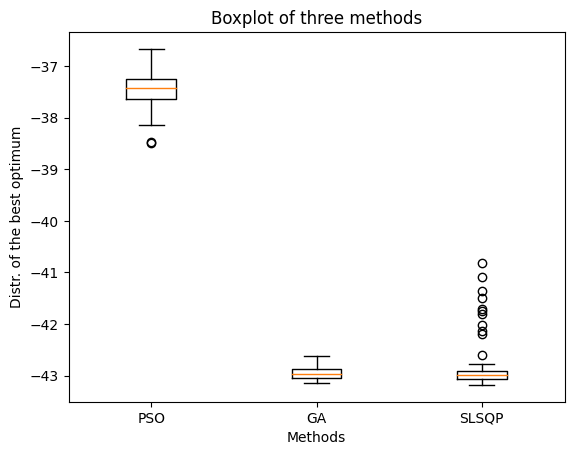

In [ ]:
# Создадим ящики с усами для трех наборов данных
plt.boxplot([g_best_pso, g_best_ga, g_best_sl])

# Установим метки для оси X
plt.xticks([1, 2, 3], ['PSO', 'GA', 'SLSQP'])

# Добавим заголовок и метки осей
plt.title('Boxplot of three methods')
plt.xlabel('Methods')
plt.ylabel('Distr. of the best optimums')

# Отобразим график
plt.show()

In [ ]:
!pip install scikit-posthocs

In [ ]:
from scipy import stats
import numpy as np

data_1 = g_best_pso
data_2 = g_best_ga
data_3 = g_best_sl

# Применяем тест Фридмана для определения наличия различий в средних 4 выборок
stats.friedmanchisquare(data_1, data_2, data_3)

FriedmanchisquareResult(statistic=151.27999999999997, pvalue=1.412424976723108e-33)

In [ ]:
import scikit_posthocs as sp

# Собираем данны в один массив
data = np.array([data_1, data_2, data_3])

# Применяем тест Nemenyi
sp.posthoc_nemenyi_friedman(data.T)

0         1         2
0  1.000  0.001000  0.001000
1  0.001  1.000000  0.496129
2  0.001  0.496129  1.000000

In [ ]:
np.round(np.mean(g_best_pso), 4)

-37.4629

In [ ]:
np.round(np.mean(g_best_ga), 4)

-42.9561

In [ ]:
np.round(np.mean(g_best_sl), 4)

-42.8739

#### **Вывод:**
1. Статистически достоверно различается только метод PSO от GA и SLSQP, так как попарные p-value в этих случаях меньше 0.05.

2. По средним значениям можно сделать вывод, что алгоритм PSO хуже справился с задачей минимизации целевой функции.